<a href="https://colab.research.google.com/github/Danielperez471/Simulacion/blob/main/UNIDAD3/Practica5_Distribucion_de_Poisson_Ejemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DISTRIBUCION POISSON - EJEMPLO 2
Supongamos que estamos modelando el número de llegadas de clientes a un cajero automático durante una hora. Basado en observaciones previas, se sabe que, en promedio, llegan 5 clientes por hora. Queremos generar variables aleatorias que representen el número de clientes que llegan en una hora, utilizando la distribución de Poisson y el método de la transformada inversa.

###Facilitador: José Gabriel Rodríguez Rivas
###Alumno: Daniel Alonso Perez Macias

Número de clientes que llegaron en cada simulación (hora):
[7, 5, 12, 6, 11, 10, 6, 4, 5, 5, 5, 6, 4, 5, 5, 7, 6, 5, 5, 7, 7, 12, 3, 6, 4, 6, 6, 7, 6, 6, 5, 4, 7, 3, 6, 2, 7, 7, 6, 5, 9, 3, 6, 9, 6, 4, 6, 2, 6, 2, 5, 1, 4, 2, 5, 1, 1, 4, 6, 3, 4, 3, 6, 10, 7, 5, 6, 3, 6, 2, 3, 5, 5, 3, 6, 3, 1, 6, 6, 1, 5, 1, 5, 7, 4, 8, 3, 4, 2, 2, 6, 2, 0, 5, 6, 12, 4, 6, 3, 6]


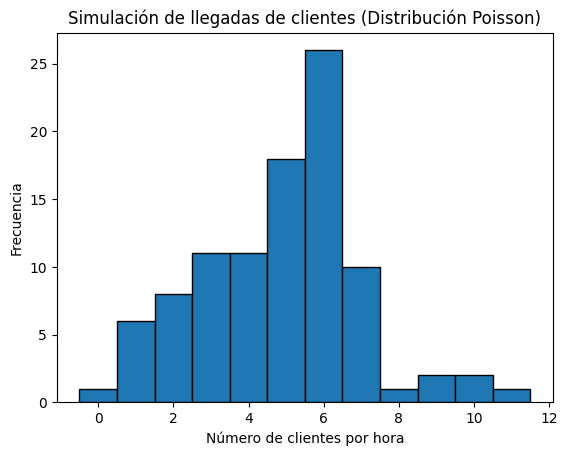

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetro de la distribución Poisson
lambda_poisson = 5  # Tasa promedio de llegadas por hora

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (horas)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de probabilidad de la distribución Poisson
def poisson_pmf(lambda_poisson, k):
    return (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)

# Función para generar números aleatorios usando la transformada inversa para la Poisson
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += poisson_pmf(lambda_poisson, k)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de llegadas
        k += 1

# Generar la cantidad de clientes que llegan en cada simulación (hora)
llegadas_simuladas = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar resultados
print("Número de clientes que llegaron en cada simulación (hora):")
print(llegadas_simuladas)

# Graficar los resultados
plt.hist(llegadas_simuladas, bins=np.arange(min(llegadas_simuladas), max(llegadas_simuladas) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.show()

#CONCLUSION
En este estudio, se simuló el número de llegadas de clientes a un cajero automático en intervalos de una hora utilizando la distribución de Poisson con una tasa promedio de λ = 5 clientes/hora y el método de la transformada inversa. A partir de los datos generados se observo lo siguiente:

Rango observado: Las llegadas variaron entre 0 y 12 clientes por hora, mostrando la dispersión característica de una distribución Poisson, donde valores extremos (como 0 o 12) son posibles pero menos frecuentes.

Tendencia central: Aunque la media teórica es 5, los datos presentan una concentración en valores cercanos (4, 5, 6 y 7 clientes/hora), lo que refleja la aleatoriedad del proceso pero con una clara agrupación alrededor de λ.

Eventos inusuales: Se registraron casos con 0 llegadas (poco probable pero posible en Poisson) y 12 llegadas (cola larga típica de la distribución), evidenciando la capacidad del modelo para capturar fluctuaciones realistas.